<center>
    <h1><b> Celebrities Image Classification Using Open CV Library</b></h1>

</center>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import cv2

%matplotlib inline

<center>
    <h2><b>Image Loading</b></h2>
</center>

In [2]:
# Reading image
img = cv2.imread(r'C:\Users\Banji\image_classification\model\test_images\sharapova1.jpg')

In [3]:
img.shape

(555, 700, 3)

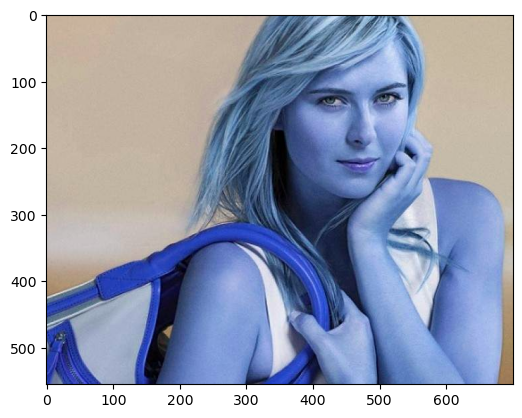

In [4]:
plt.imshow(img);

In [5]:
# To load the  image in gray color
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

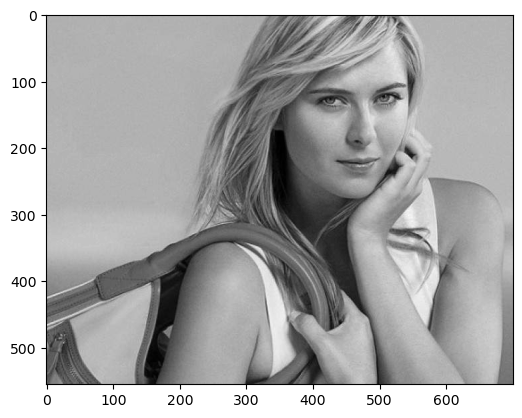

In [6]:
plt.imshow(gray, cmap = 'gray');

In [7]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

In [8]:
img.T

array([[[200, 200, 200, ...,  26,  30,  35],
        [200, 200, 200, ...,  30,  32,  34],
        [200, 200, 200, ...,  33,  35,  36],
        ...,
        [195, 196, 196, ..., 154, 154, 153],
        [194, 194, 195, ..., 154, 154, 153],
        [193, 193, 193, ..., 154, 154, 153]],

       [[179, 179, 179, ...,  58,  62,  67],
        [179, 179, 179, ...,  59,  61,  63],
        [179, 179, 179, ...,  59,  61,  62],
        ...,
        [181, 182, 182, ..., 120, 120, 119],
        [180, 180, 181, ..., 120, 120, 119],
        [179, 179, 179, ..., 120, 120, 119]],

       [[157, 157, 157, ..., 158, 162, 167],
        [157, 157, 157, ..., 163, 165, 167],
        [157, 157, 157, ..., 165, 167, 168],
        ...,
        [158, 159, 159, ...,  84,  84,  83],
        [157, 157, 158, ...,  84,  84,  83],
        [156, 156, 156, ...,  84,  84,  83]]], dtype=uint8)

#### Detecting face ad eyes using Haar Cascades

In [9]:
# To detect the face 
face_cascade = cv2.CascadeClassifier(r'C:\Users\Banji\image_classification\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
# To detect the eyes
eye_cascade = cv2.CascadeClassifier(r'C:\Users\Banji\image_classification\model\opencv\haarcascades\haarcascade_eye.xml')

# To detect multiple faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [10]:
x, y, w, h = faces[0]
x,y,w,h

(352, 38, 233, 233)

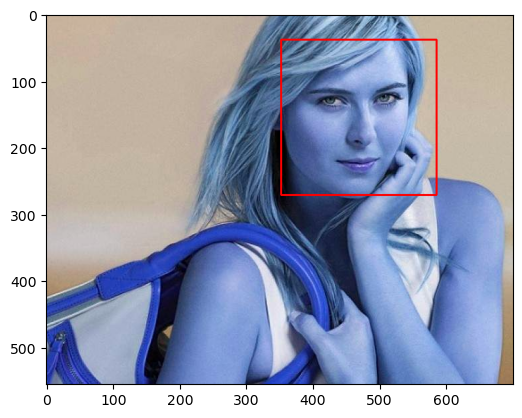

In [11]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img);

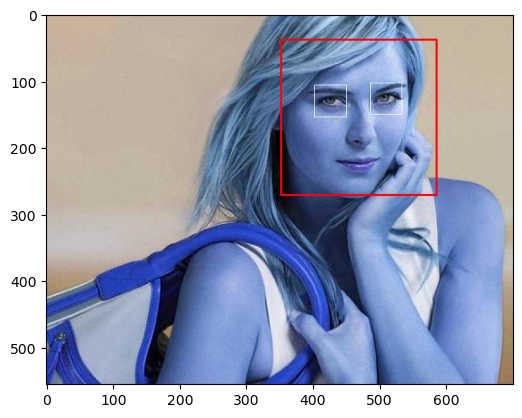

In [12]:
# To detect the two eyes
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 1)
    roi_gray = gray[y:y+h, x: x+w]
    roi_color = face_img[y:y+h, x: x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 255, 255), 1)


plt.figure()
plt.imshow(face_img, cmap = 'gray');

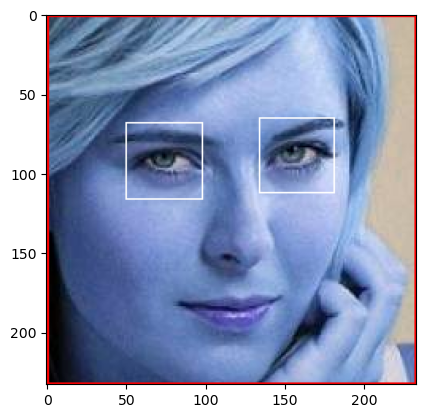

In [13]:
# TO show the cropped face
plt.imshow(roi_color, cmap ='gray');

<center>
    <h2><b>Image Cleaning</b></h2>
</center> 

### Function to detect the face of all images and crop them

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for x, y, w, h in faces:
        roi_gray = gray[y: y+h, x: x+w]
        roi_color = img[y: y+h, x: x+w]
        
        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # If two eyes are detected, return the cropped face region
        if len(eyes) >= 2:
            return roi_color
    
    # If no face with two eyes is detected, print the image name
    print(f"No face with two eyes detected in {os.path.basename(image_path)}.")
    return None

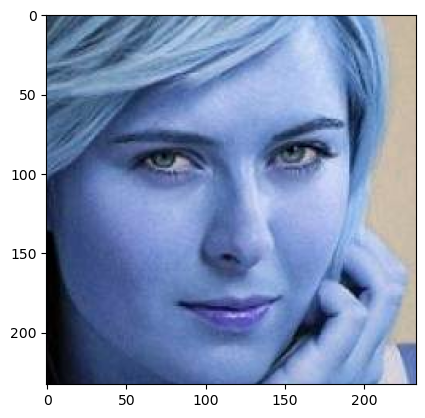

In [15]:
function_image = get_cropped_image_if_2_eyes(r'C:\Users\Banji\image_classification\model\test_images\sharapova1.jpg')
plt.imshow(function_image);

### Creating directory to save the cropped images

In [16]:
path_to_data = r'C:\Users\Banji\image_classification\model\dataset'

path_to_cropped_data  = r'C:\Users\Banji\image_classification\model\dataset\cropped'


In [17]:
# To list all the folders with dataset
image_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        image_dirs.append(entry.path)

In [18]:
# List of image directories
image_dirs

['C:\\Users\\Banji\\image_classification\\model\\dataset\\beyonce',
 'C:\\Users\\Banji\\image_classification\\model\\dataset\\kamala',
 'C:\\Users\\Banji\\image_classification\\model\\dataset\\maria',
 'C:\\Users\\Banji\\image_classification\\model\\dataset\\messi',
 'C:\\Users\\Banji\\image_classification\\model\\dataset\\putin']

In [19]:
# To create cropped folder
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [20]:
cropped_image_dirs = []  # List to store directories with cropped images
celebrity_file_names_dict = {}  # Dictionary to store celebrity names and their corresponding cropped image paths

# Loop through each directory of celebrity images
for image_dir in image_dirs:
    count = 1  # Counter for naming cropped images
    celebrity_name = image_dir.split('\\')[-1]  # Extract celebrity name from the directory path
    print(celebrity_name)  # Print the celebrity's name

    # Initialize an empty list to store the cropped file paths for each celebrity
    celebrity_file_names_dict[celebrity_name] = []

    # Loop through each image file in the celebrity's directory
    for entry in os.scandir(image_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)  # Get the cropped face with 2 eyes detected

        if roi_color is not None:  # If a valid cropped face is found
            cropped_folder = os.path.join(path_to_cropped_data, celebrity_name)  # Construct the path for saving cropped images
            
            # Create the folder if it doesn't exist
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)  # Create folder for the celebrity's cropped images
                cropped_image_dirs.append(cropped_folder)  # Add the folder to the list
                print('Generating cropped images in folder:', cropped_folder)  # Notify user

            # Define the file name for the cropped image
            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)  # Construct the path for saving the cropped image

            cv2.imwrite(cropped_file_path, roi_color)  # Save the cropped image
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)  # Add the image path to the dictionary
            count += 1  # Increment the counter for naming the next image

beyonce
Generating cropped images in folder: C:\Users\Banji\image_classification\model\dataset\cropped\beyonce
No face with two eyes detected in images (10).jpg.
No face with two eyes detected in images (100).jpg.
No face with two eyes detected in images (11).jpg.
No face with two eyes detected in images (12).jpg.
No face with two eyes detected in images (13).jpg.
No face with two eyes detected in images (14).jpg.
No face with two eyes detected in images (15).jpg.
No face with two eyes detected in images (16).jpg.
No face with two eyes detected in images (19).jpg.
No face with two eyes detected in images (2).jpg.
No face with two eyes detected in images (20).jpg.
No face with two eyes detected in images (21).jpg.
No face with two eyes detected in images (22).jpg.
No face with two eyes detected in images (23).jpg.
No face with two eyes detected in images (24).jpg.
No face with two eyes detected in images (25).jpg.
No face with two eyes detected in images (26).jpg.
No face with two eyes 

<center><h2><b>
    Feature Engineering
</b></h2></center>

In [21]:
import pywt

In [22]:
def w2d(img, mode='haar', level=1):
    # Convert to grayscale and normalize
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) / 255.0
    
    # Perform wavelet decomposition
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # Zero out approximation coefficients
    coeffs[0] *= 0
    
    # Reconstruct the image and scale back to 255
    imArray_H = pywt.waverec2(coeffs, mode) * 255
    return np.uint8(imArray_H)

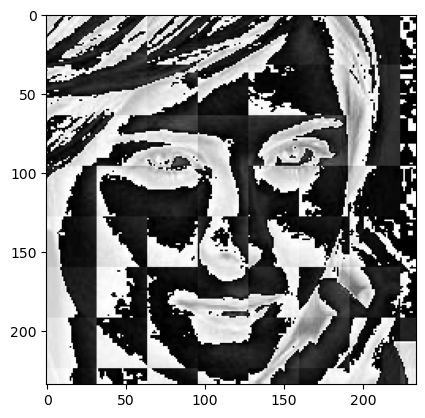

In [23]:
im_har = w2d(function_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray');

### Stacking each of the clear image to their corresponding pixelated image

In [24]:
# The dictionary to be used
celebrity_file_names_dict

{'beyonce': ['C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce1.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce2.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce3.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce4.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce5.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce6.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce7.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce8.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce9.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\beyonce\\beyonce10.png',
  'C:\\Users\\Banji\\image_classification\\model\\dataset\\cropped\\

In [25]:
# Mapping celebrity names to a number for the target variable
class_dict = {name: idx for idx, name in enumerate(celebrity_file_names_dict.keys())}
class_dict

{'beyonce': 0, 'kamala': 1, 'maria': 2, 'messi': 3, 'putin': 4}

In [26]:
X = []
y= []
# Loop through each celebrity and their corresponding training image files
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        image = cv2.imread(training_image)  # Read the image using OpenCV
        if image is None:
            continue  # Skip the image if it cannot be loaded (e.g., file is missing or corrupted)

        # Resize the raw image to 32x32 pixels
        scaled_raw_image = cv2.resize(image, (32, 32))

        # Apply the wavelet transformation (using 'db1' mode at level 5) to the image
        image_haar = w2d(image, 'db1', 5)
        scaled_haar_image = cv2.resize(image_haar, (32, 32))
        combined_image = np.vstack((scaled_raw_image.reshape(32*32*3, 1), scaled_haar_image.reshape(32*32, 1)))

        # Append the combined feature vector to X
        X.append(combined_image)
        # Append the corresponding target class (celebrity) to y
        y.append(class_dict[celebrity_name])

In [27]:
len(X)

185

In [ ]:
"""X, y = [], []  # Initialize feature matrix X and target vector y

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        image = cv2.imread(training_image)  # Read the image
        if image is None:
            continue  # Skip if the image cannot be loaded
        
        # Convert raw image to grayscale and resize to 32x32
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        scaled_raw_image = cv2.resize(gray_image, (32, 32))
        
        # Apply wavelet transformation (Haar) and resize the result to 32x32
        image_haar = w2d(image, 'db1', 5)
        scaled_haar_image = cv2.resize(image_haar, (32, 32))
        
        # Flatten both raw and haar images and stack them vertically
        combined_image = np.vstack((scaled_raw_image.flatten(), scaled_haar_image.flatten()))
        
        # Append the combined image to the feature list X
        X.append(combined_image)
        
        # Append the corresponding target class to the target list y
        y.append(class_dict[celebrity_name])
"""

In [28]:
# The size of the images
len(X[0])

4096

In [29]:
# Converting the image values to float
X = np.array(X).reshape(len(X), len(X[0])).astype(float)
X.shape

(185, 4096)

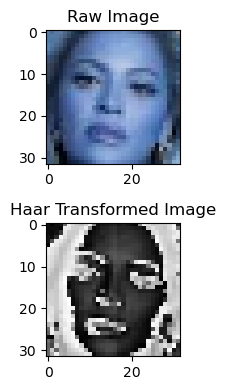

In [30]:

# TO view one of the stacked images

index = 0  # You can change this to any valid index

# Retrieve the combined image at the selected index
combined_image = X[index]

# Split the combined image into the raw and wavelet-transformed parts
raw_image = combined_image[:32*32*3].reshape(32, 32, 3)  # RGB image
haar_image = combined_image[32*32*3:].reshape(32, 32)    # Grayscale Haar image

# Plot both images stacked vertically
plt.figure(figsize=(2, 4))  # Adjust figure size for vertical stacking

# Plot raw image
plt.subplot(2, 1, 1)
plt.imshow(raw_image.astype(np.uint8))  # Convert back to uint8 for proper display
plt.title('Raw Image')

# Plot Haar-transformed image
plt.subplot(2, 1, 2)
plt.imshow(haar_image, cmap='gray')  # Grayscale image
plt.title('Haar Transformed Image')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<center>
    <h2><b>
        Model Training
    </b></h2>
</center>

In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [33]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8108108108108109

In [34]:
len(X_test)

37

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.80      0.89      0.84         9
           2       0.67      0.80      0.73         5
           3       0.83      1.00      0.91        10
           4       1.00      0.67      0.80         6

    accuracy                           0.81        37
   macro avg       0.82      0.79      0.79        37
weighted avg       0.82      0.81      0.80        37



### Using GridSearchCV to Hypertune the Parameters

In [36]:
model_params = {
    'svm': {
        'model': SVC(gamma = 'auto', probability = True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver= 'liblinear', multi_class = 'auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [37]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.817471,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.621379,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.818161,{'logisticregression__C': 1}


In [38]:
# Testing the prediction 
best_estimators['logistic_regression'].score(X_test, y_test)

0.8648648648648649

In [39]:
# Testing the prediction 
best_estimators['svm'].score(X_test, y_test)

0.8378378378378378

In [40]:
# Model to select
best_clf = best_estimators['logistic_regression']

### Viewing performance with confusion matrix

In [41]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  0,  1,  0,  1],
       [ 1,  8,  0,  0,  0],
       [ 0,  0,  4,  1,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  1,  0,  5]], dtype=int64)

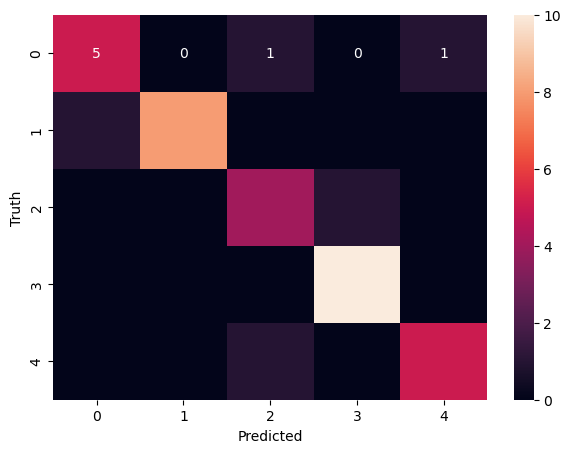

In [42]:
# To visualize the confusion matrix
plt.figure(figsize = (7, 5))
sb.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [43]:
!pip install joblib

<center>
    <h2><b>Saving The Best Model</b></h2>
</center>

In [44]:
import joblib

In [45]:
joblib.dump(best_clf, 'image_classification_model.pkl')

['image_classification_model.pkl']

### Saving the class dictionary for Python Flask server usage

In [46]:
import json
with open('image_classification_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))